In [1]:
import os
import os.path as path
import struct
import numpy as np

print('pwd:', os.getcwd())


def load_labels(file_name, debug = False):
    '''
    load MNIST labels
    http://yann.lecun.com/exdb/mnist/
    '''
    print("load labels from '%s'" % file_name)
    with open(file_name, 'rb') as f:
        # https://www.cnblogs.com/gala/archive/2011/09/22/2184801.html
        magic, size = struct.unpack('>II', f.read(8))
        '''
        repeat struct.unpack('B', f.read(1)
        '''
        labels = np.fromfile(f, dtype = np.uint8)
        if debug:
            print('magic:', magic)
            print('size:', size)
            print('labels:', labels);
            print('labels.size:', len(labels));
            print('-------------------------------------------\n')
    return labels

def load_images(file_name, debug = False):
    '''
    load MNIST images
    http://yann.lecun.com/exdb/mnist/
    '''
    print("load images from '%s'" % file_name)
    with open(file_name, 'rb') as f:
        # https://www.cnblogs.com/gala/archive/2011/09/22/2184801.html
        magic, size, rows, cols = struct.unpack('>IIII', f.read(16))
        
        '''
        repeat struct.unpack('B', f.read(1)
        '''
        pixels = rows * cols
        images = np.fromfile(f, dtype = np.uint8)
        images = images.reshape(len(images) // pixels, pixels)
        if debug:
            print('magic:', magic)
            print('size:', size)
            print('rows:', rows)
            print('cols:', cols)
            print('images:', images);
            print('images.size:', len(images));
            print('-------------------------------------------\n')
    return images

def load_dataset():
    return (
        (
            load_images(file_name = 'train-images-idx3-ubyte'),
            load_labels(file_name = 'train-labels.idx1-ubyte'),
        ), (
            load_images(file_name = 't10k-images-idx3-ubyte'),
            load_labels(file_name = 't10k-labels.idx1-ubyte')
        )
    )

(x_train, y_train), (x_test, y_test) = load_dataset()

pwd: /home/tj/Asus/workplace/ml/env/workplace
load images from 'train-images-idx3-ubyte'
load labels from 'train-labels.idx1-ubyte'
load images from 't10k-images-idx3-ubyte'
load labels from 't10k-labels.idx1-ubyte'


In [2]:
import matplotlib.pyplot as plt

def show_x_train_with_index(index):
    img = x_train[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')

def show_x_test_with_index(index):
    img = x_test[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')

show_x_train_with_index(0)

5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 

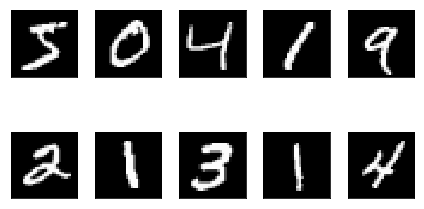

In [3]:
import matplotlib.pyplot as plt


def show_x_train_pre25():
    fig, axis = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
    axis = axis.flatten()    
    for i in range(10):
        img = x_train[i].reshape(28, 28)
        axis[i].imshow(img, cmap='gray', interpolation='nearest')
        label = y_train[i]
        print(label, end=', ')
    
    axis[0].set_xticks([])
    axis[0].set_yticks([])
    plt.tight_layout()
    plt.show()

show_x_train_pre25()

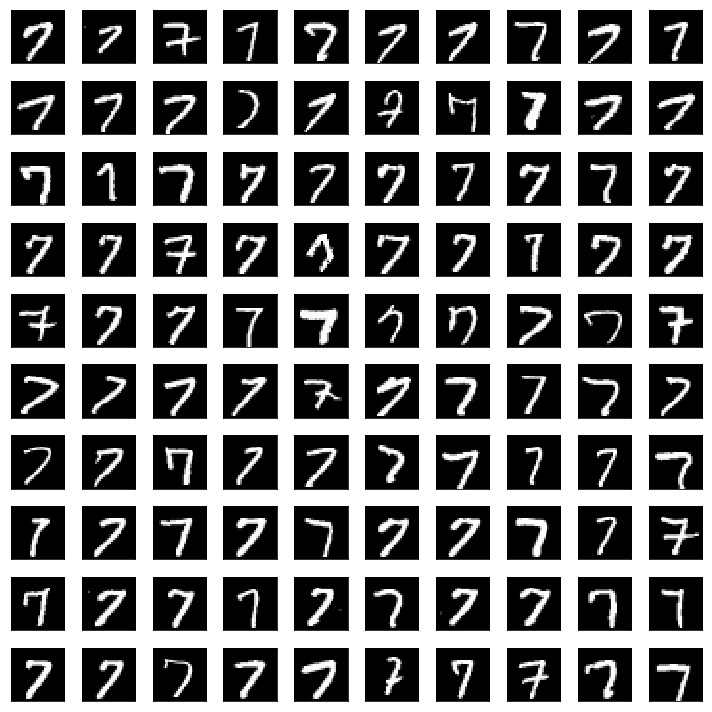

In [4]:
import matplotlib.pyplot as plt

def show_x_train_with_digit(digit):
    images = x_train[y_train == digit]
    fig, axis = plt.subplots(nrows = 10, ncols = 10, sharex = True, sharey = True, figsize=(10, 10))
    axis = axis.flatten()
    for i in range(100):
        img = images[i].reshape(28, 28)
        axis[i].imshow(img, cmap='gray', interpolation='nearest')
    axis[0].set_xticks([])
    axis[0].set_yticks([])
    plt.tight_layout()
    plt.show()

show_x_train_with_digit(7)

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

import keras
(x_train_image, y_train_label), (x_test_image, y_test_label) = load_dataset()
x_train = x_train_image
y_train = y_train_label
x_test = x_test_image
y_test = y_test_label

x_train = x_train.astype('float')
x_train /= 255

x_test = x_test.astype('float')
x_test /= 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Using TensorFlow backend.


load images from 'train-images-idx3-ubyte'
load labels from 'train-labels.idx1-ubyte'
load images from 't10k-images-idx3-ubyte'
load labels from 't10k-labels.idx1-ubyte'


In [6]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Softmax
from keras.optimizers import Adam, RMSprop

In [7]:
model = Sequential()
model.add(Dense(input_shape=(784,), units=20, activation=LeakyReLU()))
model.add(Dense(units=20, activation=LeakyReLU()))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


/home/tj/Asus/workplace/ml/env/lib/python3.5/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             #optimizer=Adam(),
             metrics=['accuracy']
)

In [9]:
batch_size = 128
epochs = 10
model.fit(
    x = x_train, 
    y = y_train, 
    batch_size = batch_size, 
    epochs = epochs, 
    verbose = 1,
    validation_data = (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.5416 - accuracy: 0.8504 - val_loss: 0.3054 - val_accuracy: 0.9137
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2802 - accuracy: 0.9197 - val_loss: 0.2529 - val_accuracy: 0.9294
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2411 - accuracy: 0.9315 - val_loss: 0.2273 - val_accuracy: 0.9354
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2159 - accuracy: 0.9387 - val_loss: 0.2100 - val_accuracy: 0.9389
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1977 - accuracy: 0.9433 - val_loss: 0.2004 - val_accuracy: 0.9419
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1841 - accuracy: 0.9475 - val_loss: 0.1966 - val_accuracy: 0.9420
Epoch 7/10
60000/60000 [==============================] - 1s 18us/st

In [12]:
index = range(0, 67)
y = model.predict(
    x = np.array(x_test[index])
)

for i in index:
    print('[' + str(i) + ']',
          np.argmax(y[i - index[0]]), '<->', y_test_label[i], 
          'Failed' if np.argmax(y[i- index[0]]) != y_test_label[i] else '')

[0] 7 <-> 7 
[1] 2 <-> 2 
[2] 1 <-> 1 
[3] 0 <-> 0 
[4] 4 <-> 4 
[5] 1 <-> 1 
[6] 4 <-> 4 
[7] 9 <-> 9 
[8] 6 <-> 5 Failed
[9] 9 <-> 9 
[10] 0 <-> 0 
[11] 6 <-> 6 
[12] 9 <-> 9 
[13] 0 <-> 0 
[14] 1 <-> 1 
[15] 5 <-> 5 
[16] 9 <-> 9 
[17] 7 <-> 7 
[18] 3 <-> 3 
[19] 4 <-> 4 
[20] 9 <-> 9 
[21] 6 <-> 6 
[22] 6 <-> 6 
[23] 5 <-> 5 
[24] 4 <-> 4 
[25] 0 <-> 0 
[26] 7 <-> 7 
[27] 4 <-> 4 
[28] 0 <-> 0 
[29] 1 <-> 1 
[30] 3 <-> 3 
[31] 1 <-> 1 
[32] 3 <-> 3 
[33] 4 <-> 4 
[34] 7 <-> 7 
[35] 2 <-> 2 
[36] 7 <-> 7 
[37] 1 <-> 1 
[38] 2 <-> 2 
[39] 1 <-> 1 
[40] 1 <-> 1 
[41] 7 <-> 7 
[42] 4 <-> 4 
[43] 2 <-> 2 
[44] 3 <-> 3 
[45] 5 <-> 5 
[46] 1 <-> 1 
[47] 2 <-> 2 
[48] 4 <-> 4 
[49] 4 <-> 4 
[50] 6 <-> 6 
[51] 3 <-> 3 
[52] 5 <-> 5 
[53] 5 <-> 5 
[54] 6 <-> 6 
[55] 0 <-> 0 
[56] 4 <-> 4 
[57] 1 <-> 1 
[58] 9 <-> 9 
[59] 5 <-> 5 
[60] 7 <-> 7 
[61] 8 <-> 8 
[62] 9 <-> 9 
[63] 3 <-> 3 
[64] 7 <-> 7 
[65] 4 <-> 4 
[66] 2 <-> 6 Failed


6

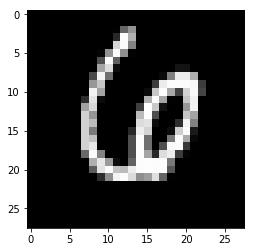

In [14]:
show_x_test_with_index(66)
y_test_label[66]